In [13]:
import yfinance as yf
import requests 
import pandas as pd
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points

In [2]:
# Creating Ticker Object
tesla = yf.Ticker("TSLA")
# Extracting desired data and assigning it to variable tesla. History function returns dataframe object.
tesla_data = tesla.history(period = "15y")
# resetting index and using inplace to make sure the change is made to the original tesla_data dataframe object rather than creating a temp object
tesla_data.reset_index(inplace = True)
tesla_data.head()
# Unforutantely the value "max" is no longer supported by the period paramater in the history function. 

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Question 2: Use Webscraping to Extract Tesla Revenue Data

Display the last five rows of the tesla_revenue dataframe using the tail function. 

In [3]:
# URL to HTML document that is stored on Coursera's server 
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Making an HTTP request to get data, extracting text
response_text = requests.get(url).text

# parsing html text using Beautiful Soup
soup = BeautifulSoup(response_text, "html5lib")

In [4]:
 # <--------------  Create dataframe object:----------------->
# Create column/header names
headers = ["Date", "Revenue"]

# Pass headers list to the columns paramater of pandas Dataframe function. 
tesla_revenue = pd.DataFrame(columns = headers)

# <----------------Add Data to our Dataframe Object-------------->
# Iterate through each table row in tbody 
for i, row in enumerate(soup.find("tbody").find_all("tr")):
    # select data cells from row 
    cols = row.find_all("td")
    dict = {}
    # add data to dict. key = header, value = cols[j]
    for j, header in enumerate(headers):
        dict[header] = str(cols[j].text)
    # adds new row to dataframe; append is deprecated for version of python I am using.
    # While I was able to find a workaround using _append, I preferred to use the loc function we learned prior
    tesla_revenue.loc[len(tesla_revenue)] = dict 

tesla_revenue.tail()

,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


In [5]:
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "")
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "")
tesla_revenue.head()
type(tesla_revenue.Date.iloc[0])

str

### Question 3: Use yfinance to Extract Stock Data

Reset the index, save, and display the first five rows of the gme_data dataframe using the head function.

In [6]:
gme = yf.Ticker("GME")
gme_data = gme.history(period = "25y")
gme_data.reset_index(inplace = True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4: Use Webscraping to Extract GME Revenue Data

Display the last five rows of the gme_revenue dataframe using the tail function.

In [7]:
url =  "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Utilize pandas read_html function to read html data from url. Select first index of html tables returned. 
gme_revenue = pd.read_html(url)[0]
gme_revenue.rename(columns = {"GameStop Annual Revenue (Millions of US $)": "Date", "GameStop Annual Revenue (Millions of US $).1":"Revenue"}, inplace = True)
gme_revenue.tail()

,Date,Revenue
11,2009,"$8,806"
12,2008,"$7,094"
13,2007,"$5,319"
14,2006,"$3,092"
15,2005,"$1,843"


In [8]:
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "")
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "")
gme_revenue["Date"] = gme_revenue["Date"].astype("str")
gme_revenue.head()

,Date,Revenue
0,2020,6466
1,2019,8285
2,2018,8547
3,2017,7965
4,2016,9364


### Question 5: Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph.

In [9]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=1, cols=2, subplot_titles=("Historical Share Price", "Historical Revenue"))
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date < '2021-06-14']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=1, col=2)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=2)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=1, col=2)
    fig.update_layout(showlegend=False,
    height=500,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

C:\Users\wong-\AppData\Local\Temp\ipykernel_20276\4204624307.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\wong-\AppData\Local\Temp\ipykernel_20276\4204624307.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



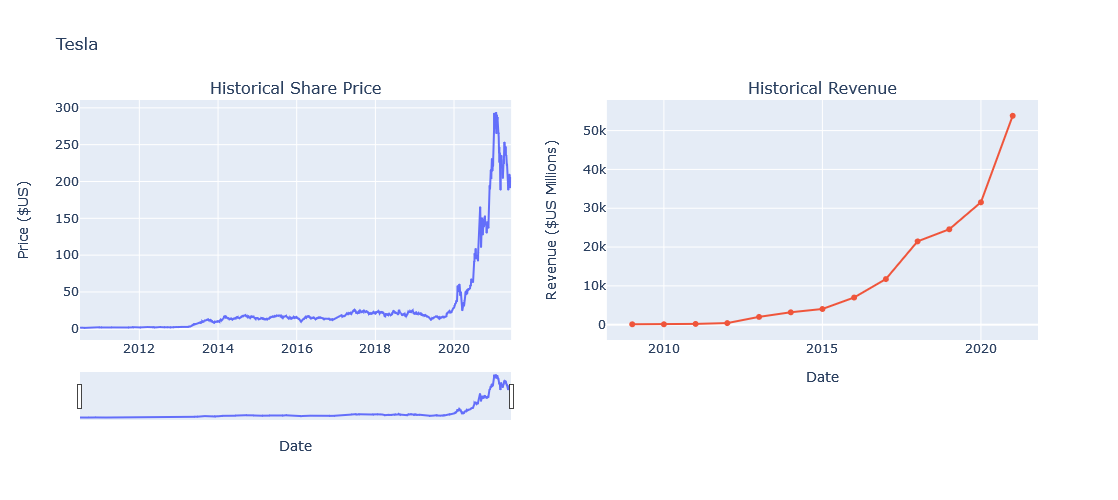

In [14]:
make_graph(tesla_data, tesla_revenue, "Tesla")

### Question 6: Plot GameStop Stock Graph

C:\Users\wong-\AppData\Local\Temp\ipykernel_20276\4204624307.py:5: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\wong-\AppData\Local\Temp\ipykernel_20276\4204624307.py:6: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



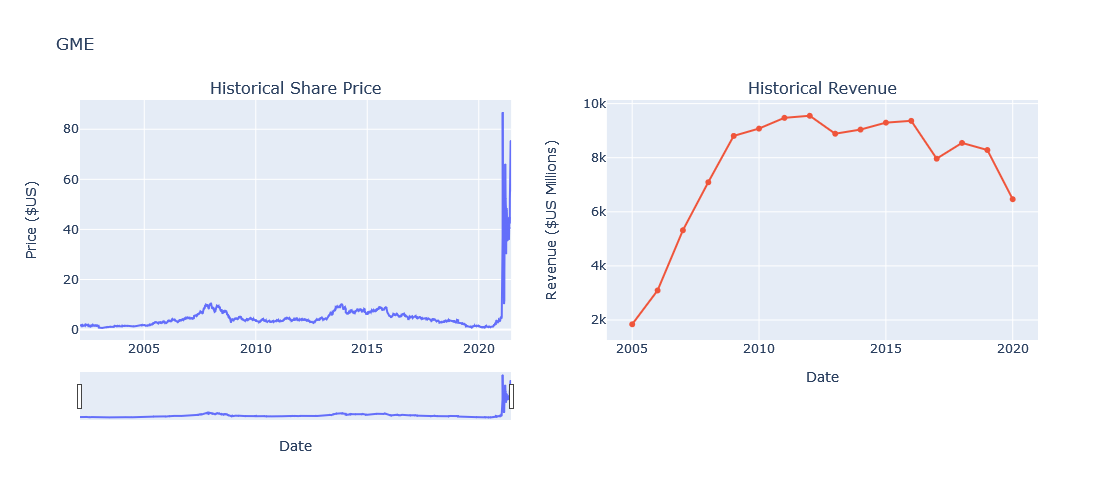

In [15]:
make_graph(gme_data, gme_revenue, "GME")